In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import chardet
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from scipy.stats import norm,shapiro,normaltest

<font size=6 color='#13DAE2'>
<b>Importing Guajira data</b>
</font>
<br>

Para seguir los pasos, montar el documento csv

In [4]:
AllData = pd.read_csv('../data/raw/AllDataLG.csv',sep=';', encoding='ISO-8859-1', skiprows=1)

In [5]:
AllData.head()

,Month,Hour of the day,Hour of the year,Load A,Load B,Load A + random,Load B + random,Regime1 (m?/h),Regime2 (m?/h),Regime3 (m?/h),IDEAM,MERRA2,ERA5,IDEAM .1,MERRA2.1,ERA5 .1,IDEAM .2,MERRA2.2,ERA5 .2
0,1.0,1.0,1.0,4.6,4.0,4.5,4.1,0.0,107.4,9.6,0.0,0.0,0.0,4.483,6.99,6.244,28.6,24.56,25.659
1,1.0,2.0,2.0,4.8,4.3,4.9,4.3,0.0,107.4,2.4,0.0,0.0,0.0,4.417,7.14,6.528,28.3,24.56,25.491
2,1.0,3.0,3.0,4.8,4.6,4.7,4.6,0.0,107.4,3.6,0.0,0.0,0.0,6.217,7.20,6.663,28.0,24.71,25.403
3,1.0,4.0,4.0,4.8,4.7,4.8,4.7,0.0,107.4,7.2,0.0,0.0,0.0,5.750,7.86,6.681,27.7,25.60,25.197
4,1.0,5.0,5.0,4.7,4.6,4.8,4.5,0.0,107.4,15.6,0.0,0.0,0.0,5.058,8.62,6.705,27.4,26.88,25.080


In [6]:
AllData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             8760 non-null   float64
 1   Hour of the day   8760 non-null   float64
 2   Hour of the year  8760 non-null   float64
 3   Load A            8760 non-null   float64
 4   Load B            8760 non-null   float64
 5   Load A + random   8760 non-null   float64
 6   Load B + random   8760 non-null   float64
 7   Regime1 (m?/h)    8760 non-null   float64
 8   Regime2 (m?/h)    8760 non-null   float64
 9   Regime3 (m?/h)    8760 non-null   float64
 10   IDEAM            8760 non-null   float64
 11   MERRA2           8760 non-null   float64
 12   ERA5             8760 non-null   float64
 13   IDEAM .1         8760 non-null   float64
 14   MERRA2.1         8760 non-null   float64
 15   ERA5 .1          8760 non-null   float64
 16   IDEAM .2         8760 non-null   float64


Rows with null values, which are not representative in the general scheme, are deleted.

In [7]:
AllData[AllData.isnull().any(axis=1)]

,Month,Hour of the day,Hour of the year,Load A,Load B,Load A + random,Load B + random,Regime1 (m?/h),Regime2 (m?/h),Regime3 (m?/h),IDEAM,MERRA2,ERA5,IDEAM .1,MERRA2.1,ERA5 .1,IDEAM .2,MERRA2.2,ERA5 .2
8760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
AllDataNotNan = AllData.dropna()

In [9]:
AllDataNotNan.isna().sum()

Month               0
Hour of the day     0
Hour of the year    0
Load A              0
Load B              0
Load A + random     0
Load B + random     0
Regime1 (m?/h)      0
Regime2 (m?/h)      0
Regime3 (m?/h)      0
 IDEAM              0
 MERRA2             0
 ERA5               0
 IDEAM .1           0
 MERRA2.1           0
 ERA5 .1            0
 IDEAM .2           0
 MERRA2.2           0
 ERA5 .2            0
dtype: int64

We extract the columns we are interested in as a copy to ensure the integrity of the original data.

In [10]:
efficiencyCols = ['Month','Hour of the day',' IDEAM ',' IDEAM .2']
efficiencyDf = pd.DataFrame(np.copy(AllDataNotNan[efficiencyCols])).rename(columns = {0:'Month',1:'Hour',2:'SolarRad[W/m2]',3:'Tamb[°C]'}) # Renombramos las columnas de interes

In [11]:
efficiencyDf.head()

,Month,Hour,SolarRad[W/m2],Tamb[°C]
0,1.0,1.0,0.0,28.6
1,1.0,2.0,0.0,28.3
2,1.0,3.0,0.0,28.0
3,1.0,4.0,0.0,27.7
4,1.0,5.0,0.0,27.4


<font size=4 color='#13DAE2'>
<b>Solar panel information</b>
</font>
<br>
<font size=3 color='#13DAE2'>
<b>According to the datasheet</b>
<b>The user can include the data of his or her panel</b>
</font>
<br>

#####Traditional solar panel - FurutaSun FU590MV

In [12]:
A_traditional = 2.5832 #Área del panel [m2]
nref_traditional = 0.228 #Eficiencia del panel solar [%]
NOCT_traditional = 45 #Temperatura Nominal de Operación de Célula Fotovoltaica (45+-2) [°C]
B_traditional = -0.29  #Coeficiente de temperatura [%/°C]

#####Flexible Solar Panel - Sunport Power SPP365QHES

In [13]:
A_flexible = 1.9136 #Área del panel en [m2]
nref_flexible = 0.207 #Eficiencia del panel solar [%]
NOCT_flexible = 43  #Temperatura Nominal de Operación de Célula Fotovoltaica (43+-2) [°C]
B_flexible =  -0.0036 #Coeficiente de temperatura [%/°C]

<font size=5 color='#13DAE2'>
<b>Solar Panel Calculations</b>
</font>
<br>
<font size=4 color='#13DAE2'>
<b>Power and Efficiency</b>
</font>
<br>

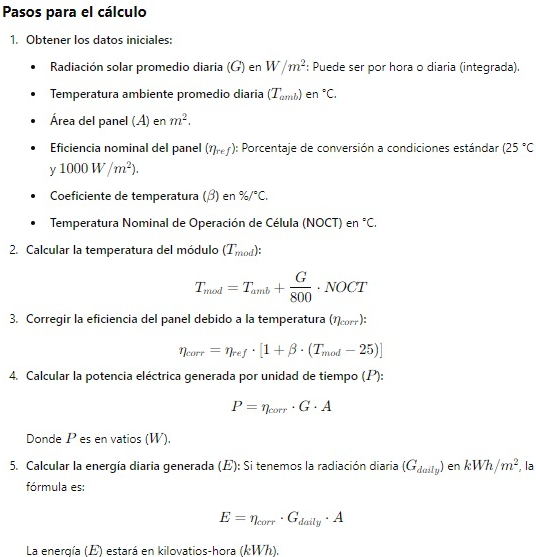

<font size=4 color='#13DAE2'>
<b>Modify the datasheet parameters</b>
</font>
<br>

In [14]:
def moduleTemp(row:pd.Series) -> pd.Series:
    """
    This function is used for calculating the Module temperature

    args:
        row: dataframe row that constains the needed columns for ambient temperature, and solar radiation
    returns:
        Tmod: Module temperature
    """

    NOCT = 43
    Tmod = row['Tamb[°C]'] + ((row['SolarRad[W/m2]']/800) * NOCT)
    return Tmod

def ncorr(row:pd.Series) -> pd.Series:
    """
    Function to calculate the correction for the efficiency of the panel

    args:
        row   pd.Series
    returns:
        ncorr   Efficiency correction term
    """
    nref = 0.207
    B = -0.0036

    ncorr = nref * ( 1 + B * (row['Tmod[°C]'] - 25) )
    return ncorr

def electricPower(row:pd.Series) -> pd.Series:
    """
    Function to calculate the Electric power by time unit

    args:
        row     pd.Series

    returns:
        P       Electric power by time unit
    """

    A = 1.9136

    P = row['ncorr%'] * row['SolarRad[W/m2]'] * A
    return P

In [15]:
efficiencyDf['Tmod[°C]'] = efficiencyDf.apply(moduleTemp, axis=1)
efficiencyDf['ncorr%'] = efficiencyDf.apply(ncorr, axis=1)
efficiencyDf['P[W]'] = efficiencyDf.apply(electricPower, axis=1)

In [16]:
efficiencyDf.sample(10)

,Month,Hour,SolarRad[W/m2],Tamb[°C],Tmod[°C],ncorr%,P[W]
6257,9.0,18.0,217.0,31.22,42.883750,0.193673,80.422958
96,1.0,1.0,0.0,26.72,26.720000,0.205718,0.000000
3658,6.0,11.0,591.7,28.45,60.253875,0.180729,204.635099
6033,9.0,10.0,597.6,27.73,59.851000,0.181029,207.018895
3764,6.0,21.0,0.0,32.93,32.930000,0.201091,0.000000
593,1.0,18.0,175.2,28.14,37.557000,0.197643,66.262170
3148,5.0,5.0,0.0,26.45,26.450000,0.205919,0.000000
3325,5.0,14.0,717.9,35.00,73.587125,0.170793,234.630715
3967,6.0,8.0,173.6,28.00,37.331000,0.197811,65.712984
1824,3.0,1.0,0.0,27.00,27.000000,0.205510,0.000000


# We plot the power

In [17]:
power_data = efficiencyDf['P[W]']
mean = power_data.mean()
std_dev = power_data.std()
print(f"Media: {mean:.2f}, Desviación estándar: {std_dev:.2f}")

Media: 74.86, Desviación estándar: 98.99


c:\Users\Jhon_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


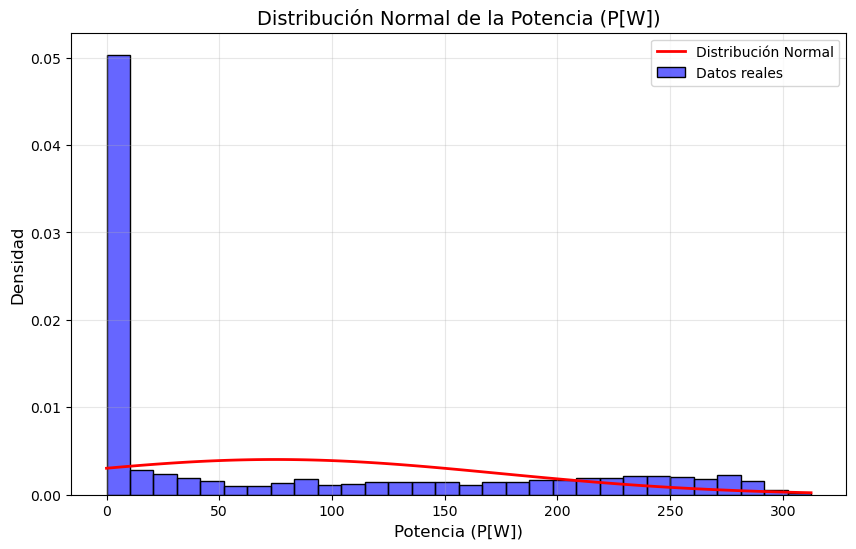

In [18]:
# Graph the distribution of the data
plt.figure(figsize=(10, 6))

# Histogram with density of the actual data
sns.histplot(power_data, kde=False, stat="density", bins=30, color='blue', label='Datos reales', alpha=0.6)

# Generate values for the normal curve
x = np.linspace(power_data.min(), power_data.max(), 100)
y = norm.pdf(x, mean, std_dev)  # Probability density function (PDF)

# Superimpose the normal distribution curve
plt.plot(x, y, color='red', label='Distribución Normal', linewidth=2)

plt.title("Distribución Normal de la Potencia (P[W])", fontsize=14)
plt.xlabel("Potencia (P[W])", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('../images/normal_dist_power.png')


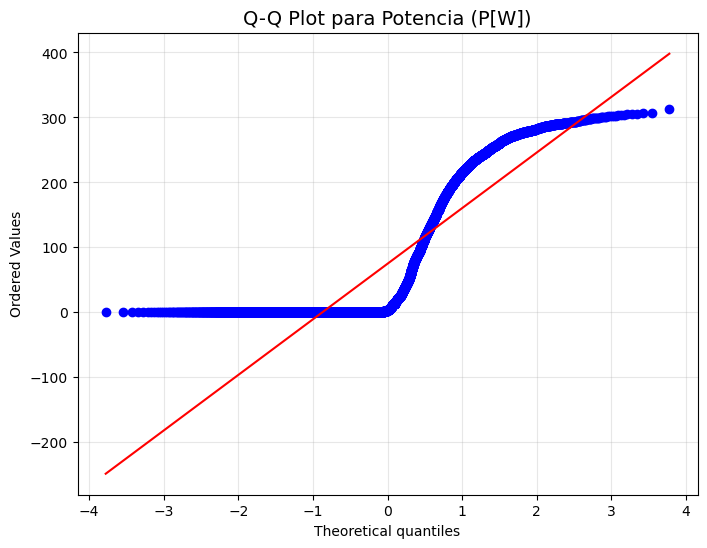

In [21]:
# Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(power_data, dist="norm", plot=plt)
plt.title("Q-Q Plot para Potencia (P[W])", fontsize=14)
plt.grid(alpha=0.3)
plt.savefig('../images/Qplot.png')


In [22]:
# Shapiro-Wilk test
stat, p = shapiro(power_data)
print(f"Prueba de Shapiro-Wilk: estadístico={stat:.3f}, p-valor={p:.3f}")

# D'Agostino and Pearson's test
stat, p = normaltest(power_data)
print(f"Prueba de D’Agostino: estadístico={stat:.3f}, p-valor={p:.3f}")

if p > 0.05:
    print("No se puede rechazar la hipótesis nula: los datos siguen una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los datos no siguen una distribución normal.")


Prueba de Shapiro-Wilk: estadístico=0.746, p-valor=0.000
Prueba de D’Agostino: estadístico=1449.182, p-valor=0.000
Se rechaza la hipótesis nula: los datos no siguen una distribución normal.


c:\Users\Jhon_\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [23]:
# Calendar percentiles
low_threshold = efficiencyDf['P[W]'].quantile(0.33)  # Percentil 33
mid_threshold = efficiencyDf['P[W]'].quantile(0.66)  # Percentil 66

# Create the categorical column
def categorize_power_by_percentile(p):
    if p <= low_threshold:        # Below the 33rd percentile
        return 'Low'
    elif low_threshold < p <= mid_threshold:  # Between 33rd and 66th percentile
        return 'Medium'
    else:                        # Above the 66th percentile
        return 'High'

efficiencyDf['Power_Category'] = efficiencyDf['P[W]'].apply(categorize_power_by_percentile)
print(efficiencyDf[['P[W]', 'Power_Category']].head())
print(efficiencyDf['Power_Category'].value_counts())

   P[W] Power_Category
0   0.0            Low
1   0.0            Low
2   0.0            Low
3   0.0            Low
4   0.0            Low
Power_Category
Low       4198
High      2979
Medium    1583
Name: count, dtype: int64


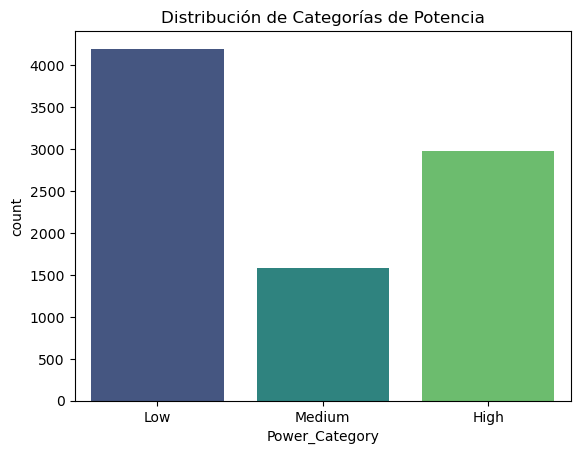

In [24]:
# Bar chart of the categories
sns.countplot(data=efficiencyDf, x='Power_Category', palette='viridis')
plt.title('Distribución de Categorías de Potencia')
plt.savefig('../images/Dis_cat.png')

# Modelo Machine Learning

Random Forest

In [25]:
from sklearn.preprocessing import LabelEncoder

# Coding the categories in numbers (Low=0, Medium=1, High=2)
encoder = LabelEncoder()
efficiencyDf['Power_Category_Label'] = encoder.fit_transform(efficiencyDf['Power_Category'])

# Show mapping
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))


{'High': 0, 'Low': 1, 'Medium': 2}


In [26]:
X = efficiencyDf[['SolarRad[W/m2]', 'Tamb[°C]', 'Tmod[°C]', 'ncorr%']]
y = efficiencyDf['Power_Category_Label']

In [27]:
from sklearn.model_selection import train_test_split # We call the libraries to separate the data in test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create the model
model = RandomForestClassifier(random_state=42)

# Training the model
model.fit(X_train, y_train)

# Evaluating the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       568
           1       1.00      1.00      1.00       854
           2       0.99      0.99      0.99       330

    accuracy                           1.00      1752
   macro avg       1.00      1.00      1.00      1752
weighted avg       1.00      1.00      1.00      1752



In [29]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Obtain the importance of the characteristics
feature_importances = rf_model.feature_importances_


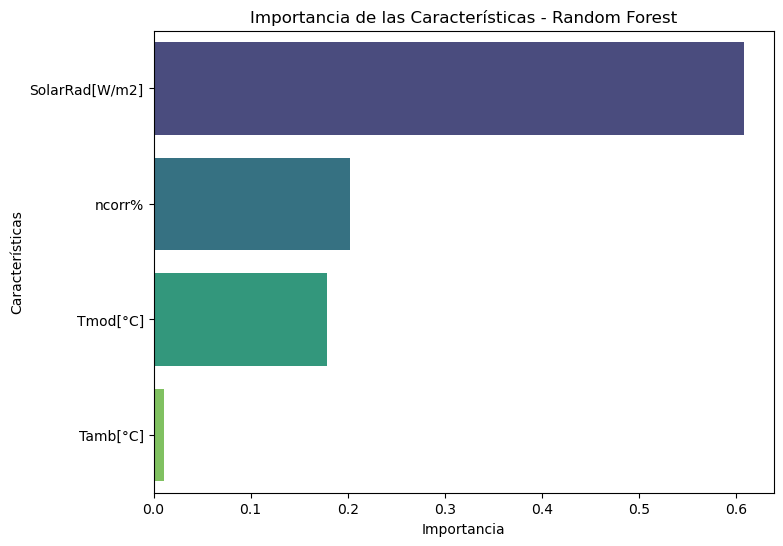

In [30]:
# Create a DataFrame with the following importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Importancia de las Características - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.savefig('../images/variable_weigth.png')


In [31]:
import shap

# Create an explainer object for Random Forest
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the input samples
shap_values = explainer.shap_values(X)

# Visualizar resumen de las características más importantes
shap.summary_plot(shap_values, X, plot_type="bar")


ModuleNotFoundError: No module named 'shap'

Electrical power delivered per month, for energy it is necessary to multiply by time unit.

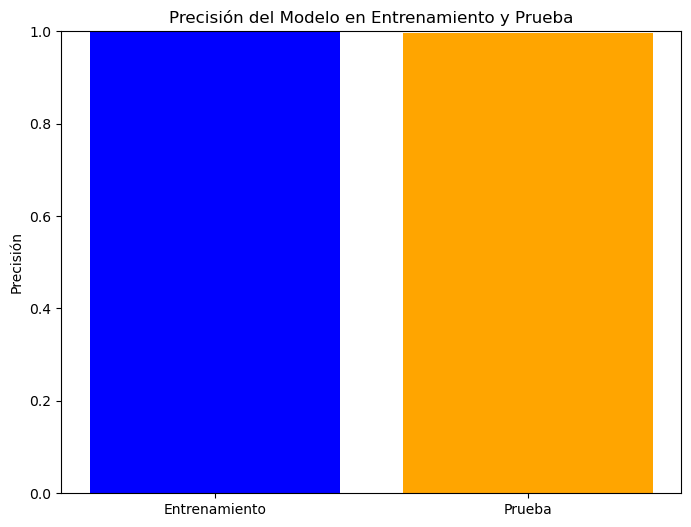

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Training the model with the training set
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Calculate predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate precisions
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
plt.bar(['Entrenamiento', 'Prueba'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.title('Precisión del Modelo en Entrenamiento y Prueba')
plt.ylabel('Precisión')
plt.savefig('../images/model_preci.png')


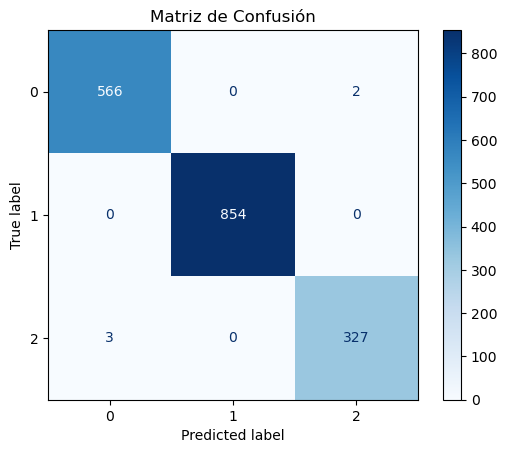

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión')
plt.savefig('../images/confusion_matrix.png')


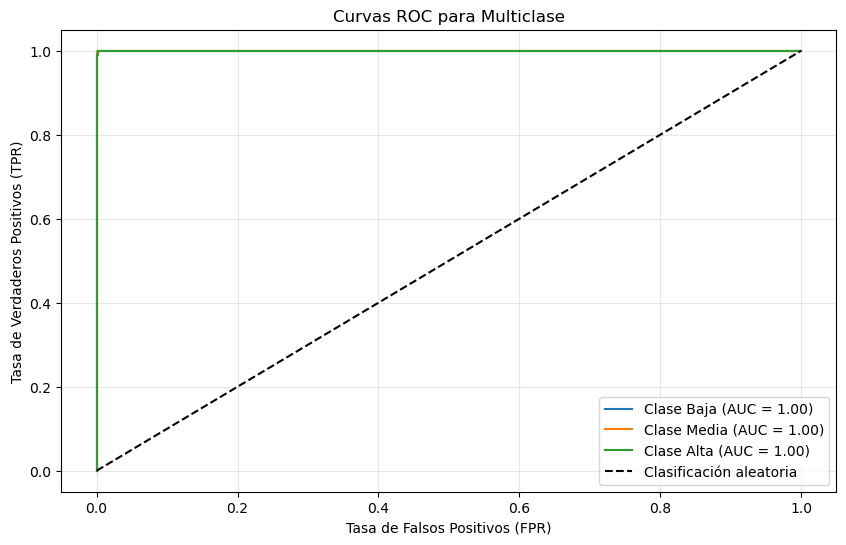

In [35]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score

# Binarize labels (if classes are [0, 1, 2])
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba = rf_model.predict_proba(X_test)

# Plot the ROC curve for each class.
plt.figure(figsize=(10, 6))
for i, class_label in enumerate(['Baja', 'Media', 'Alta']):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"Clase {class_label} (AUC = {auc:.2f})")

# Configuración de la gráfica
plt.plot([0, 1], [0, 1], 'k--', label="Clasificación aleatoria")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curvas ROC para Multiclase")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.savefig('../images/ROC_plot.png')


# Transformacion de los datos para LSTM

In [37]:
# Create the cyclic transformations for the month
efficiencyDf['Month_sin'] = np.sin(2 * np.pi * efficiencyDf['Month'] / 12)
efficiencyDf['Month_cos'] = np.cos(2 * np.pi * efficiencyDf['Month'] / 12)

# Create the cyclic transformations for time
efficiencyDf['Hour_sin'] = np.sin(2 * np.pi * efficiencyDf['Hour'] / 24)
efficiencyDf['Hour_cos'] = np.cos(2 * np.pi * efficiencyDf['Hour'] / 24)


In [38]:
# Selecting the characteristics and target
features = ['SolarRad[W/m2]', 'Tamb[°C]', 'Tmod[°C]', 'ncorr%', 'Month_sin', 'Month_cos', 'Hour_sin', 'Hour_cos']
target = ['P[W]']

# Scaling features and objectives
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(efficiencyDf[features + target])
df_scaled = pd.DataFrame(data_scaled, columns=features + target)


In [39]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])  # All the characteristics except the last column (target)
        y.append(data[i+seq_length, -1])    # The last column (target)
    return np.array(X), np.array(y)

# Sequence length
seq_length = 10  # Using 10 steps above to predict the next step

# Create the sequences
X, y = create_sequences(df_scaled.values, seq_length)

# Split into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
# Create the architecture of the model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(1)  # Prediction of a value (P[W])
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


c:\Users\Jhon_\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
# Training the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 33s 46ms/step - loss: 0.0387 - val_loss: 0.0128
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0128 - val_loss: 0.0084
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0105 - val_loss: 0.0070
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0094 - val_loss: 0.0080
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0090 - val_loss: 0.0059
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0088 - val_loss: 0.0058
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0078 - val_loss: 0.0056
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0074 - val_loss: 0.0051
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0070 - val_loss: 0.0049
Epoch 10/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0071 - val_loss: 0.0047


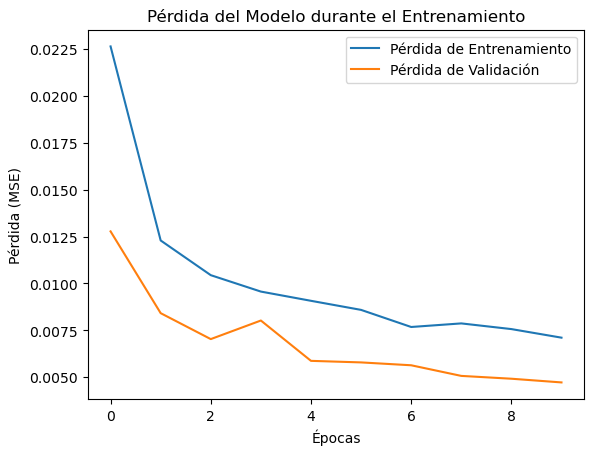

In [52]:
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida del Modelo durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.savefig('../images/Loss_plot_power.png')


In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predictions in the test set
y_pred = model.predict(X_test)

# De-scaling the data to interpret
y_test_rescaled = scaler.inverse_transform(np.concatenate((np.zeros((y_test.shape[0], X_test.shape[2])), y_test.reshape(-1, 1)), axis=1))[:, -1]
y_pred_rescaled = scaler.inverse_transform(np.concatenate((np.zeros((y_pred.shape[0], X_test.shape[2])), y_pred), axis=1))[:, -1]

# Calculate metrics
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
print(f'MSE: {mse:.2f}, MAE: {mae:.2f}')

55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step
MSE: 461.37, MAE: 11.20


In [45]:
# Use the latest data as input for future predictions
future_steps = 10
last_sequence = df_scaled.values[-seq_length:, :-1]  # Last known sequence
predictions = []

for _ in range(future_steps):
    pred = model.predict(last_sequence[np.newaxis, :, :])[0, 0]
    predictions.append(pred)
    last_sequence = np.vstack([last_sequence[1:], np.append(last_sequence[-1, :-1], pred)])

predictions_rescaled = scaler.inverse_transform(np.concatenate((np.zeros((len(predictions), len(features))), np.array(predictions).reshape(-1, 1)), axis=1))[:, -1]
print(predictions_rescaled)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
[ 0.36082807 -0.22724374 -0.34402003  0.12219118  1.43774839  4.41854451
 10.82504224 20.83142363 28.59805945 29.36212446]


In [46]:
predictions_rescaled = scaler.inverse_transform(np.concatenate((np.zeros((len(predictions), len(features))), np.array(predictions).reshape(-1, 1)), axis=1))[:, -1]
print(predictions_rescaled)


[ 0.36082807 -0.22724374 -0.34402003  0.12219118  1.43774839  4.41854451
 10.82504224 20.83142363 28.59805945 29.36212446]


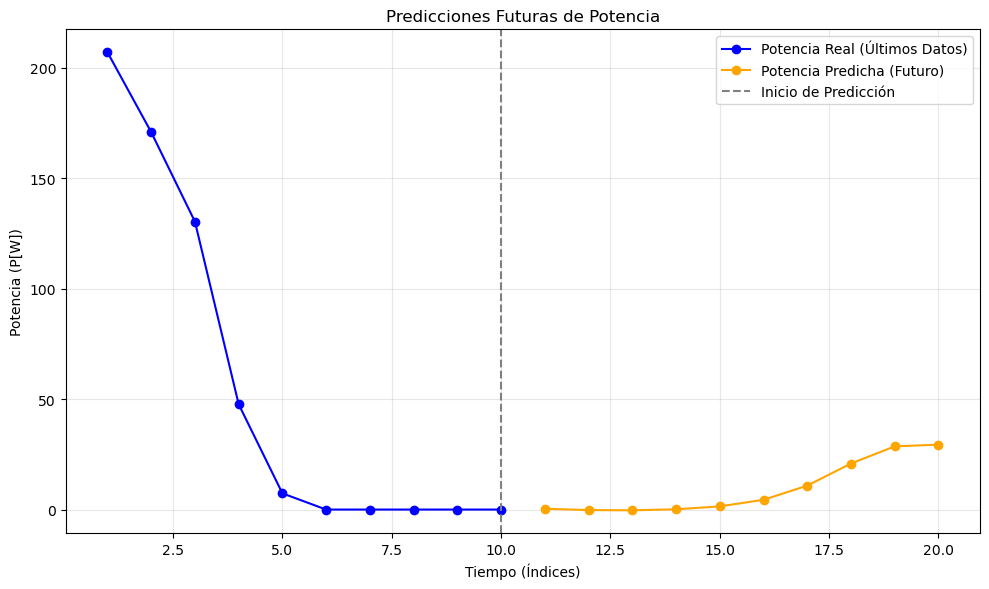

In [47]:
# Number of actual points to display before predictions
real_points = 10  # Last 10 actual values

# Obtain the last actual (de-scaled) values
last_real_values = scaler.inverse_transform(
    np.concatenate(
        (np.zeros((real_points, len(features))), y[-real_points:].reshape(-1, 1)),
        axis=1
    )
)[:, -1]

# Create a time range for the data
time_real = np.arange(1, real_points + 1)  # Indexes for real values
time_future = np.arange(real_points + 1, real_points + 1 + len(predictions_rescaled))  # Indexes for predictions

# Plot actual data and predictions
plt.figure(figsize=(10, 6))
plt.plot(time_real, last_real_values, label='Potencia Real (Últimos Datos)', marker='o', color='blue')
plt.plot(time_future, predictions_rescaled, label='Potencia Predicha (Futuro)', marker='o', color='orange')

plt.axvline(x=real_points, color='gray', linestyle='--', label='Inicio de Predicción')
plt.title('Predicciones Futuras de Potencia')
plt.xlabel('Tiempo (Índices)')
plt.ylabel('Potencia (P[W])')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../images/future_predict.png')


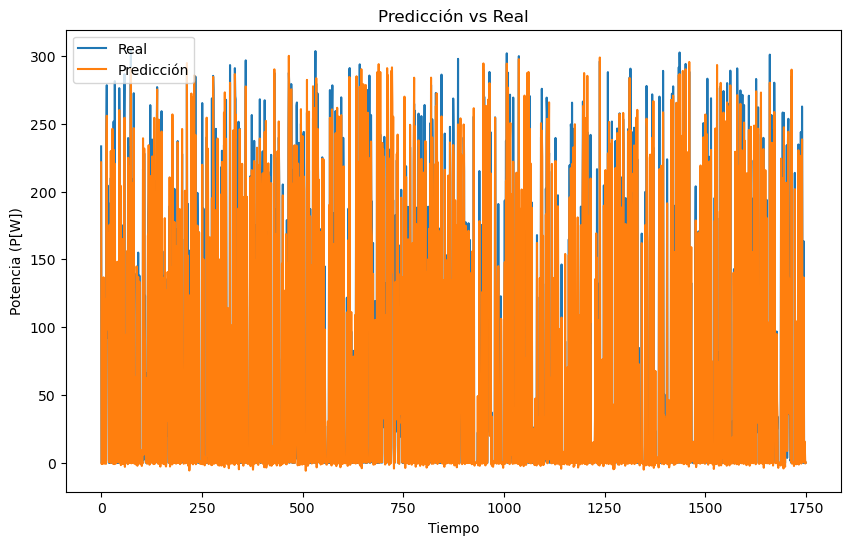

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_rescaled)), y_test_rescaled, label='Real')
plt.plot(range(len(y_pred_rescaled)), y_pred_rescaled, label='Predicción')
plt.title('Predicción vs Real')
plt.xlabel('Tiempo')
plt.ylabel('Potencia (P[W])')
plt.legend()
plt.savefig('../images/compare_real_predict.png')


In [49]:
efficiencyDf[['Month','P[W]']].groupby(by='Month').sum()

,P[W]
Month,
1.0,53462.786389
2.0,48584.771258
3.0,58577.252675
4.0,54158.771599
5.0,57204.995028
6.0,61146.316089
7.0,62753.814076
8.0,53865.369406
9.0,58558.604429


# Efficiency analysis of solar panels

Shows how the efficiency of the panels will behave over time and compared to the supplier's data.

In [50]:
# Calculate the average ncorr% grouped by Month and Hour.
average_ncorr = efficiencyDf.groupby(['Month', 'Hour'])['ncorr%'].transform('mean')

# Create a new column in the DataFrame with these averages
efficiencyDf['ncorr%_promedio'] = average_ncorr

# Verify the result
print(efficiencyDf[['Month', 'Hour', 'ncorr%', 'ncorr%_promedio']].head(10))

   Month  Hour    ncorr%  ncorr%_promedio
0    1.0   1.0  0.204317         0.206138
1    1.0   2.0  0.204541         0.206374
2    1.0   3.0  0.204764         0.206610
3    1.0   4.0  0.204988         0.206847
4    1.0   5.0  0.205212         0.207084
5    1.0   6.0  0.205435         0.207320
6    1.0   7.0  0.205659         0.207557
7    1.0   8.0  0.205236         0.206611
8    1.0   9.0  0.200739         0.199674
9    1.0  10.0  0.193708         0.190947


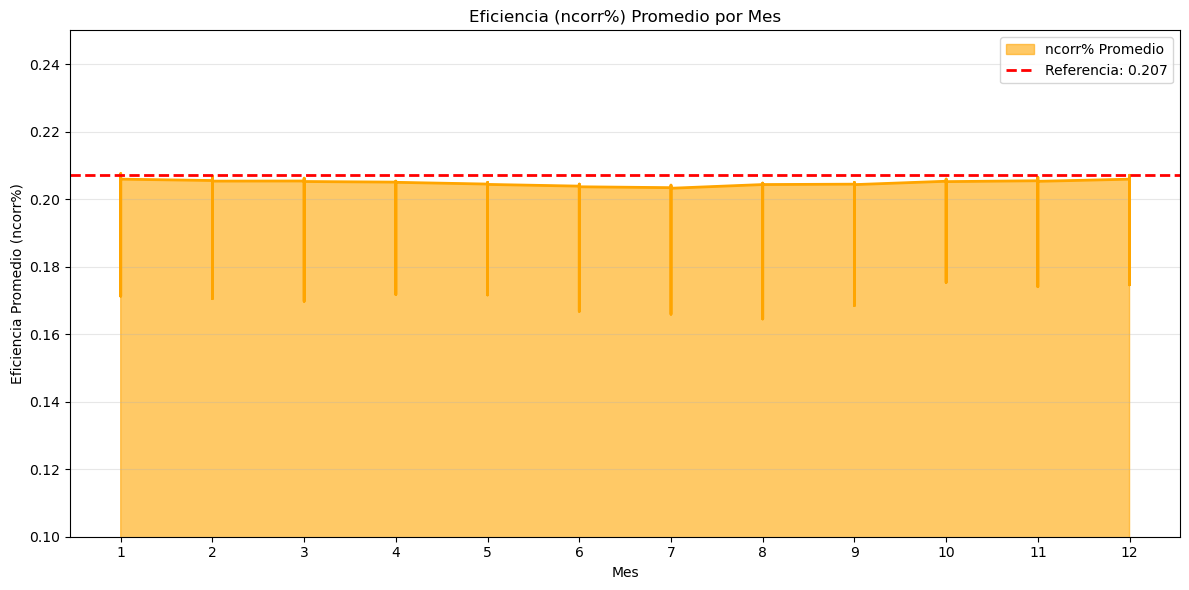

In [51]:
# Create the area chart
plt.figure(figsize=(12, 6))
plt.fill_between(efficiencyDf['Month'], efficiencyDf['ncorr%_promedio'], color='orange', alpha=0.6, label='ncorr% Promedio')

# Agregar una línea sobre el área para mayor claridad
plt.plot(efficiencyDf['Month'], efficiencyDf['ncorr%_promedio'], color='orange', linewidth=2)

# Add a reference line
reference_value = nref_flexible  # Adjusts the supplier's reference value
plt.axhline(y=reference_value, color='red', linestyle='--', linewidth=2, label=f'Referencia: {reference_value}')

# Set Y-axis limits manually
plt.ylim(0.1, 0.25)

# Configure the chart
plt.title('Eficiencia (ncorr%) Promedio por Mes')
plt.xlabel('Mes')
plt.ylabel('Eficiencia Promedio (ncorr%)')
plt.xticks(ticks=range(1, 13), labels=range(1, 13))  # Month labels
plt.legend()
plt.grid(axis='y', alpha=0.3)  # Grid only in the Y-axis
plt.tight_layout()
plt.savefig('../images/efficiency_panel')

c:\Users\Jhon_\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 36s 39ms/step - loss: 0.1305 - val_loss: 0.0132
Epoch 2/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - loss: 0.0089 - val_loss: 0.0071
Epoch 3/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0062 - val_loss: 0.0071
Epoch 4/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0061 - val_loss: 0.0088
Epoch 5/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.0057 - val_loss: 0.0085
Epoch 6/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0059 - val_loss: 0.0062
Epoch 7/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0058 - val_loss: 0.0061
Epoch 8/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0058 - val_loss: 0.0063
Epoch 9/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0057 - val_loss: 0.0078
Epoch 10/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0053 - val_loss: 0.0062
Epoch 11/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0052 - val_loss: 0.0063
Epoch 12/15
438/438 ━━━━━━━━━━━━━━━━━━━

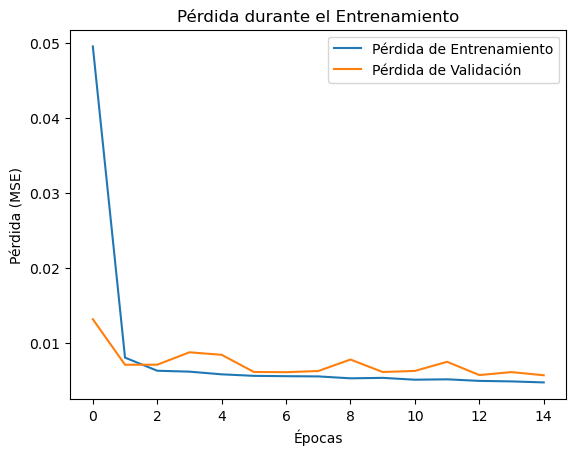

In [53]:
# Use ncorr% as time series
data = efficiencyDf[['ncorr%']].values

# Escalar los datos entre 0 y 1
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences for training and testing
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Length of the sequences (10 steps back to predict)
seq_length = 10
X, y = create_sequences(data_scaled, seq_length)

# Split into training and test sets (80% training, 20% test).
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define the architecture of the LSTM network
model = Sequential([
    LSTM(64, activation='relu', input_shape=(seq_length, 1), return_sequences=False),
    Dense(1)  # Output: Prediction of ncorr%.
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=16)

# Graphing loss during training
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.savefig('../images/Loss_plot_effi.png')

# 6 month forecast (6 steps ahead)
future_steps = 6
last_sequence = data_scaled[-seq_length:]  # Last 10 known values
predictions = []

for _ in range(future_steps):
    pred = model.predict(last_sequence[np.newaxis, :, :])[0]  # Next step prediction
    predictions.append(pred)
    last_sequence = np.append(last_sequence[1:], pred).reshape(seq_length, 1)

# Desescalar las predicciones
predictions_rescaled = scaler.inverse_transform(predictions)


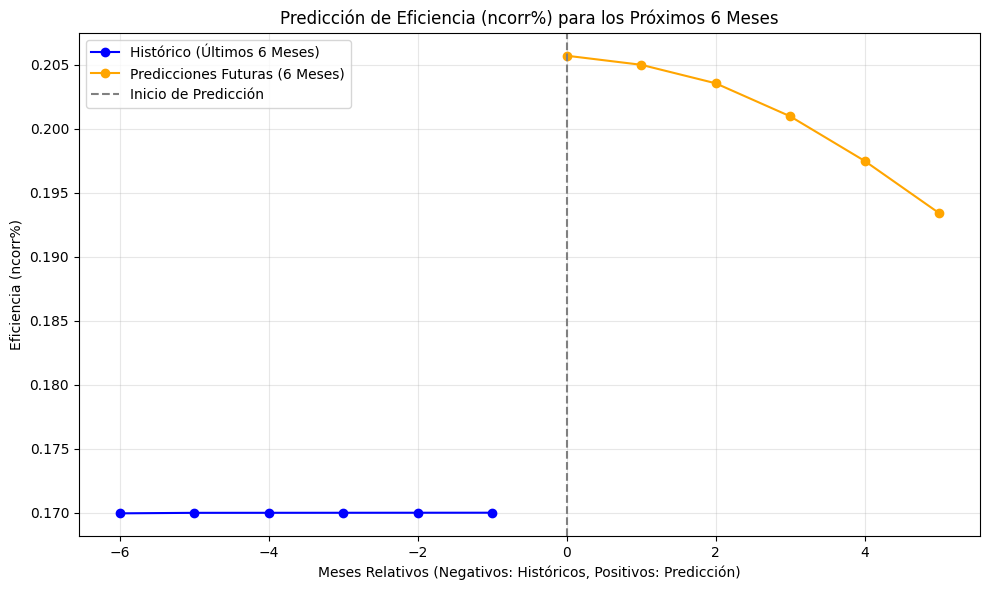

In [ ]:
# Extraer los últimos 6 meses históricos
last_6_months = scaler.inverse_transform(data[-6:])

# Crear índices para los últimos 6 meses y los 6 meses futuros
time_real = range(-6, 0)  # Índices para los últimos 6 meses
time_future = range(0, future_steps)  # Índices para los próximos 6 meses

# Graficar
plt.figure(figsize=(10, 6))

# Gráfica de los últimos 6 meses
plt.plot(time_real, last_6_months.flatten(), label='Histórico (Últimos 6 Meses)', color='blue', marker='o')

# Gráfica de las predicciones futuras
plt.plot(time_future, predictions_rescaled.flatten(), label='Predicciones Futuras (6 Meses)', color='orange', marker='o')

# Configuración del diseño
plt.axvline(x=0, color='gray', linestyle='--', label='Inicio de Predicción')  # Línea separando histórico y predicción
plt.title('Predicción de Eficiencia (ncorr%) para los Próximos 6 Meses')
plt.xlabel('Meses Relativos (Negativos: Históricos, Positivos: Predicción)')
plt.ylabel('Eficiencia (ncorr%)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../images/future_predict_effi.png')

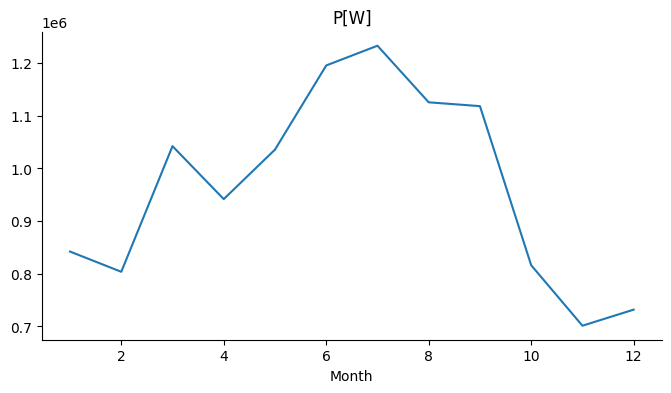

In [ ]:
from matplotlib import pyplot as plt
_df_1['P[W]'].plot(kind='line', figsize=(8, 4), title='P[W]')
plt.gca().spines[['top', 'right']].set_visible(False)

<font size=6 color='#13DAE2'>
<b>Importing NOAA data</b>
</font>
<br>

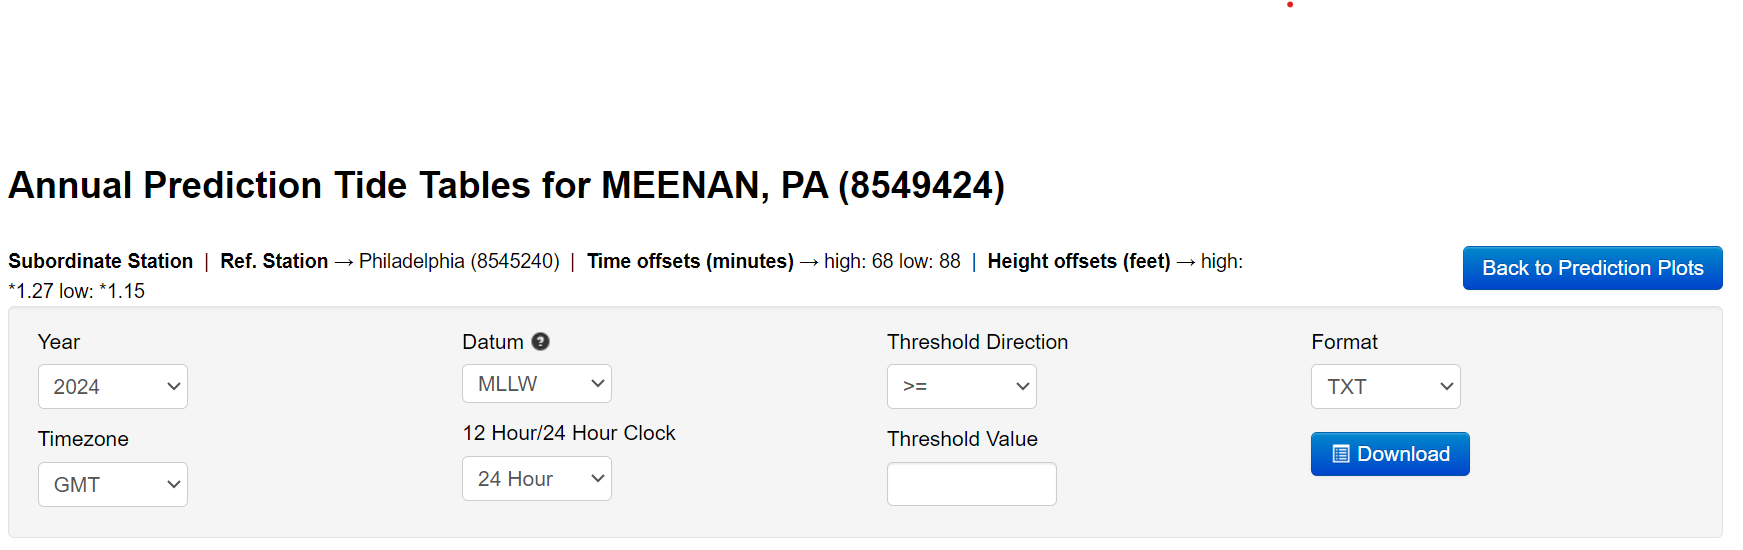

Datum: MLLW stands for Mean Lowe Low Water

The average of the lower low water height of each tidal day observed over the National Tidal Datum Epoch. For stations with shorter series, comparison of simultaneous observations with a control tide station is made in order to derive the equivalent datum of the National Tidal Datum Epoch.




Aquí podemos extrar datos de cada año por separado y luego concatenarlos para tener uno completo


Luego de descargar y renombrar los archivos de NOAA para las predicciones de las mareas, los cargamos como txt


In [55]:
# Get all .txt files in the folder
# Change ud necessary
file_list = ['2022.txt','2023.txt','2024.txt','2025.txt','2026.txt']

In [56]:
# Store all in a list
dfs = []

# rows to skip for each year data 2022,2023,2024,2025,2026 -- Change if necessary
skip = [19,20,20,20,20]

In [60]:
# Separate the columns using a regex (regular expression) given that some columns are separated by
# \t and others by \t\t, having a inhomogeneous delimeter

for i,file in zip(skip,file_list):
    df = pd.read_csv('../data/raw/' + file, sep=r'\t+', engine='python', skiprows=i, header=None)
    # Append the dataframe to the list
    dfs.append(df)

In [63]:
# Concatenate all dataframes into a single dataframe
combined_df = pd.concat(dfs, ignore_index=True)

# Set the columns names
combined_df.columns = combined_df.iloc[0]
combined_df = combined_df[1:].reset_index(drop=True)

combined_df.head(10)
# Save the result as a CSV file
combined_df.to_csv("../data/processed/mareomotrizData.csv", index=False)

In [64]:
# Read new data
data2 = pd.read_csv("../data/processed/mareomotrizData.csv")
data2.head(10)

,Date,Day,Time,Pred(Ft),Pred(cm),High/Low
0,2022/01/01,Sat,00:41,-0.10,-3,L
1,2022/01/01,Sat,05:41,6.82,208,H
2,2022/01/01,Sat,12:47,-0.03,-1,L
3,2022/01/01,Sat,18:03,8.45,258,H
4,2022/01/02,Sun,01:39,-0.10,-3,L
5,2022/01/02,Sun,06:36,6.83,208,H
6,2022/01/02,Sun,13:42,-0.10,-3,L
7,2022/01/02,Sun,18:57,8.53,260,H
8,2022/01/03,Mon,02:34,-0.21,-6,L
9,2022/01/03,Mon,07:31,6.84,208,H


In [65]:
# Turn data type from object to datetime

# Combine and tranform into datetime
data2['datetime(hours)'] = pd.to_datetime(data2['Date '] + ' ' + data2['Time'], format='%Y/%m/%d %H:%M').dt.floor('h')

# Set the height pred in meters

data2['height(m)'] = np.round(data2['Pred(cm)'] / 100,2)

# Drop unnecesary columns
data2.drop(columns=['Date ','Time','Day', 'Pred(Ft)','Pred(cm)'], inplace=True)

# Set the new index
data2.set_index('datetime(hours)', inplace=True)
data2

,High/Low,height(m)
datetime(hours),,
2022-01-01 00:00:00,L,-0.03
2022-01-01 05:00:00,H,2.08
2022-01-01 12:00:00,L,-0.01
2022-01-01 18:00:00,H,2.58
2022-01-02 01:00:00,L,-0.03
...,...,...
2026-12-30 19:00:00,L,0.02
2026-12-31 01:00:00,H,2.19
2026-12-31 08:00:00,L,-0.08


In [66]:
# verify data integrity
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7056 entries, 2022-01-01 00:00:00 to 2026-12-31 20:00:00
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High/Low   7056 non-null   object 
 1   height(m)  7056 non-null   float64
dtypes: float64(1), object(1)
memory usage: 165.4+ KB


### Why Regular Intervals Are Useful for LSTM Uniform Time Steps:

- LSTMs assume that the input sequence corresponds to evenly spaced time steps. Uneven intervals can introduce implicit biases and misrepresent temporal dynamics.
Time Dependence:

- LSTMs learn relationships between consecutive data points. If the time intervals between points are irregular, the model may struggle to capture meaningful patterns.
Avoiding Missing Data Issues:

- Regular intervals prevent the need for the model to "guess" relationships between widely spaced data points, leading to better predictions.

<font size=6 color='#13DAE2'>
<b>Fixing not evenly reported data</b>
</font>
<br>

Since it is better to analyse the data having it stored evely reported in time, we can wither interpolate to find new values for all hours, or simple increase the time frame we consider for each measurement, a good aproach would be to consider daily reports of efficiency or dayly reports of some characteristic real value that can give us information about how many times the tidal variations happend in a day and how bug the variations where

In [67]:
# Detect increasing and decreasing tide heights
data2['change'] = data2['height(m)'].diff()  # Positive if tide is increasing, negative if decreasing

# Create a new column to detect peaks and troughs (where change switches)
data2['direction'] = data2['change'].apply(lambda x: 'increase' if x > 0 else ('decrease' if x < 0 else 'no_change'))

data2

,High/Low,height(m),change,direction
datetime(hours),,,,
2022-01-01 00:00:00,L,-0.03,NaN,no_change
2022-01-01 05:00:00,H,2.08,2.11,increase
2022-01-01 12:00:00,L,-0.01,-2.09,decrease
2022-01-01 18:00:00,H,2.58,2.59,increase
2022-01-02 01:00:00,L,-0.03,-2.61,decrease
...,...,...,...,...
2026-12-30 19:00:00,L,0.02,-2.17,decrease
2026-12-31 01:00:00,H,2.19,2.17,increase
2026-12-31 08:00:00,L,-0.08,-2.27,decrease


In [68]:
# Initialize list to store deltas
deltas = []

# Loop through the data to detect transitions and calculate deltas
for i in range(1, len(data2)-1):
    if data2['direction'].iloc[i] == 'decrease' and data2['direction'].iloc[i-1] == 'increase':
        # Tide increased and then decreased (a peak)
        delta = data2['height(m)'].iloc[i] - data2['height(m)'].iloc[i-1]
        deltas.append({'start_time': data2.index[i-1], 'end_time': data2.index[i], 'delta': delta})

    elif data2['direction'].iloc[i] == 'increase' and data2['direction'].iloc[i-1] == 'decrease':
        # Tide decreased and then increased (a trough)
        delta = data2['height(m)'].iloc[i] - data2['height(m)'].iloc[i-1]
        deltas.append({'start_time': data2.index[i-1], 'end_time': data2.index[i], 'delta': delta})

# Create a DataFrame with the delta values
delta_df = pd.DataFrame(deltas)

In [69]:
delta_df

,start_time,end_time,delta
0,2022-01-01 05:00:00,2022-01-01 12:00:00,-2.09
1,2022-01-01 12:00:00,2022-01-01 18:00:00,2.59
2,2022-01-01 18:00:00,2022-01-02 01:00:00,-2.61
3,2022-01-02 01:00:00,2022-01-02 06:00:00,2.11
4,2022-01-02 06:00:00,2022-01-02 13:00:00,-2.11
...,...,...,...
7047,2026-12-30 07:00:00,2026-12-30 12:00:00,2.27
7048,2026-12-30 12:00:00,2026-12-30 19:00:00,-2.17
7049,2026-12-30 19:00:00,2026-12-31 01:00:00,2.17
7050,2026-12-31 01:00:00,2026-12-31 08:00:00,-2.27


Now that we have determined when the tide is increasing its height and when its decreasing, we can calculate the amount of energy generated for each time this happens


Tidal Energy Formula
The energy generated by tidal power systems, especially those based on water height differences (e.g., filling ducts or moving turbines), is typically calculated using the following formula:
$$
𝐸=𝜌⋅𝑔⋅ℎ⋅𝐴⋅𝜂⋅Δℎ
$$


Where:

$𝐸$ is the energy generated (in joules, J).

$𝜌$ is the density of seawater (approximately 1000 kg/m³).

$𝑔$ is the acceleration due to gravity (9.81 m/s²).

$ℎ$ is the height of the water (initial height or the average height).

$𝐴$ is the area through which the water flows (e.g., the area of the ducts).

$𝜂$ is the efficiency of the system (this can vary depending on the design).

$Δℎ$ is the change in tide height (which you've already calculated as the delta).


Step-by-Step Approach


Calculate the Volume of Water Moved:

The delta $(Δℎ)$ corresponds to the change in tide height. If you know the area
$𝐴$ through which the water flows, you can calculate the volume of water that moves during each tide change.
$$
𝑉=𝐴⋅Δℎ
$$

Calculate the Potential Energy:
The potential energy stored in the water is calculated using the formula above. The change in height (Δℎ) represents the energy conversion from the tide's potential energy to electrical energy.


Apply Efficiency:
Since not all the potential energy is converted into usable electrical energy, you apply the efficiency factor
𝜂 (between 0 and 1) to adjust the energy calculation.


Energy Calculation for Each Delta:
You can calculate the energy for each delta (change in tide height) and store the results.

In [70]:
# Constants (assumed values)
rho = 1000  # Density of seawater (kg/m³)
g = 9.81  # Gravitational acceleration (m/s²)
A = 50000  # Area (m²) through which the water flows
eta = 0.85  # Efficiency of the system                      Ideal reported or predicted one

# Calculate energy generated during each delta
delta_df['energy(J)'] = rho * g * A * eta * delta_df['delta']
delta_df.loc[delta_df['energy(J)'] < 0, 'energy(J)'] = 0

delta_df

,start_time,end_time,delta,energy(J)
0,2022-01-01 05:00:00,2022-01-01 12:00:00,-2.09,0.000000e+00
1,2022-01-01 12:00:00,2022-01-01 18:00:00,2.59,1.079836e+09
2,2022-01-01 18:00:00,2022-01-02 01:00:00,-2.61,0.000000e+00
3,2022-01-02 01:00:00,2022-01-02 06:00:00,2.11,8.797118e+08
4,2022-01-02 06:00:00,2022-01-02 13:00:00,-2.11,0.000000e+00
...,...,...,...,...
7047,2026-12-30 07:00:00,2026-12-30 12:00:00,2.27,9.464198e+08
7048,2026-12-30 12:00:00,2026-12-30 19:00:00,-2.17,0.000000e+00
7049,2026-12-30 19:00:00,2026-12-31 01:00:00,2.17,9.047272e+08
7050,2026-12-31 01:00:00,2026-12-31 08:00:00,-2.27,0.000000e+00


Finally, we can even the intervals by using a group by for each day

In [71]:

# Group by the date part of start_time
daily_summary = delta_df.groupby(delta_df['start_time'].dt.date).agg(
    total_energy_J=('energy(J)', 'sum'),
    delta_count=('delta', 'count')
)

# Rename the index for clarity
daily_summary.index.name = 'date'

# Display the summary
daily_summary

,total_energy_J,delta_count
date,,
2022-01-01,1.079836e+09,3
2022-01-02,1.976224e+09,4
2022-01-03,1.992901e+09,4
2022-01-04,1.988732e+09,4
2022-01-05,1.972055e+09,4
...,...,...
2026-12-27,1.930363e+09,4
2026-12-28,1.905347e+09,4
2026-12-29,1.876162e+09,3


# From energy in Joules to power in watts

The most important thing is to know the time in seconds

In [72]:
# Calcular la potencia en watts por día (asumiendo 86400 segundos por día)
daily_summary['power_watts'] = daily_summary['total_energy_J'] / 86400

# Mostrar los primeros datos con la nueva columna
print(daily_summary.head())

            total_energy_J  delta_count   power_watts
date                                                 
2022-01-01    1.079836e+09            3  12498.098958
2022-01-02    1.976224e+09            4  22872.968750
2022-01-03    1.992901e+09            4  23065.989583
2022-01-04    1.988732e+09            4  23017.734375
2022-01-05    1.972055e+09            4  22824.713542


Now this, is ready to feed the LSTM model!

<font size=6 color='#13DAE2'>
<b>Using Long Short Term Memory (LSTM) </b>
</font>
<br>

It is ideal to find the efficiency by hou

#1. Prepare the Data
(a) Ensure that the data is sorted by date.

In [73]:
# Sort the daily summary by date (if not already sorted)
daily_summary.sort_index(inplace=True)
daily_summary

,total_energy_J,delta_count,power_watts
date,,,
2022-01-01,1.079836e+09,3,12498.098958
2022-01-02,1.976224e+09,4,22872.968750
2022-01-03,1.992901e+09,4,23065.989583
2022-01-04,1.988732e+09,4,23017.734375
2022-01-05,1.972055e+09,4,22824.713542
...,...,...,...
2026-12-27,1.930363e+09,4,22342.161458
2026-12-28,1.905347e+09,4,22052.630208
2026-12-29,1.876162e+09,3,21714.843750


(b) Scaling the LSTM columns works best when the data is scaled in a small range (e.g. between 0 and 1).

In [74]:
# Select the energy and count columns
features = ['power_watts', 'delta_count']

# Initialise the climber
scaler = MinMaxScaler(feature_range=(0, 1))

# Scaling the data
scaled_data = scaler.fit_transform(daily_summary[features])

# Create a new scaled DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=features, index=daily_summary.index)
scaled_df


,power_watts,delta_count
date,,
2022-01-01,0.209040,0.5
2022-01-02,0.816384,1.0
2022-01-03,0.827684,1.0
2022-01-04,0.824859,1.0
2022-01-05,0.813559,1.0
...,...,...
2026-12-27,0.785311,1.0
2026-12-28,0.768362,1.0
2026-12-29,0.748588,0.5


(c) Create time windows

LSTM requires data to be structured as time sequences. This means that we will create sliding windows to use past values as input and predict the next value.

In [75]:
def create_sequences(data, seq_length):
    X, y = [], [] # Initialise empty lists
    for i in range(len(data) - seq_length): # Iterate through the data
        # Input window (past features)
        X.append(data[i:i+seq_length, :])  # All features
        # Target value (the next step)
        y.append(data[i+seq_length, :])   # Predict all characteristics
    return np.array(X), np.array(y)

# Sequence length
seq_length = 7  # For example, using 7 days in the past to predict the next day.

# Create sequences
X, y = create_sequences(scaled_data, seq_length)


(d) Split into training and testing

Divide the data into a training set and a test set.

In [76]:
# Split into training and test (80% training, 20% test)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


#2. Define the LSTM Network
Design an LSTM network to predict both characteristics (total_energy_J and delta_count).

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Create the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(2)  # Two outputs: total_energy_J and delta_count
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


c:\Users\Jhon_\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#3. Train the Model
Train the model with the training data.

In [78]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - loss: 0.2627 - val_loss: 0.0348
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0467 - val_loss: 0.0337
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0429 - val_loss: 0.0348
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0406 - val_loss: 0.0329
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0392 - val_loss: 0.0337
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0441 - val_loss: 0.0314
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0408 - val_loss: 0.0322
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0381 - val_loss: 0.0303
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0372 - val_loss: 0.0311
Epoch 10/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0369 - val_loss: 0.0293


#4. Evaluating the Model
Evaluates the model in the test set.

In [79]:
# Evaluate in the test assembly
loss = model.evaluate(X_test, y_test)
print(f"Loss en el conjunto de prueba: {loss}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0275 
Loss en el conjunto de prueba: 0.02928474359214306


#5. Making Predictions
It generates predictions for the test set and de-scales the data to interpret the results.

In [80]:
# Hacer predicciones
predictions = model.predict(X_test)

# Invert the scaling to return to the original values.
y_test_rescaled = scaler.inverse_transform(y_test)
predictions_rescaled = scaler.inverse_transform(predictions)

# Create a DataFrame to compare results
results = pd.DataFrame({
    'real_power': y_test_rescaled[:, 0],
    'predicted_power': predictions_rescaled[:, 0],
    'real_count': y_test_rescaled[:, 1],
    'predicted_count': predictions_rescaled[:, 1]
})


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step


#6. Viewing the Results
Compare predictions with actual values.

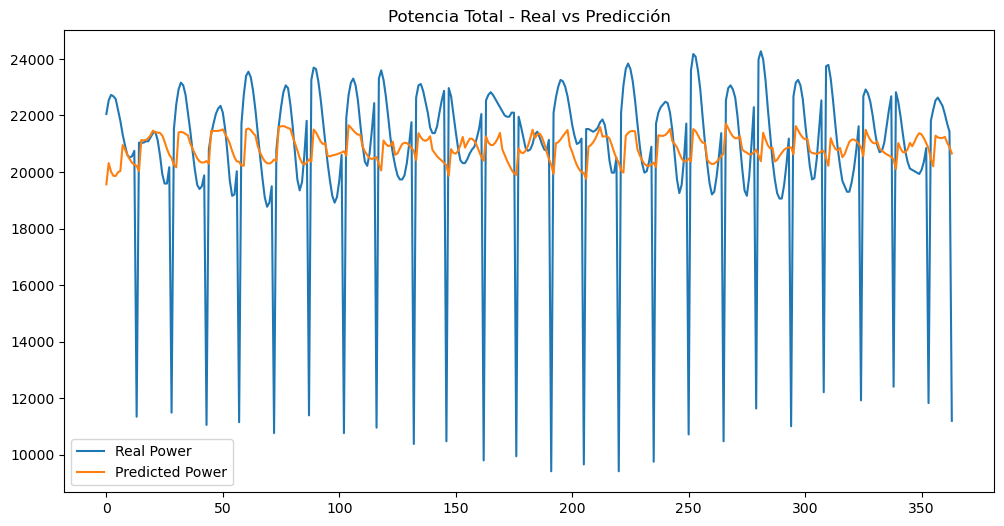

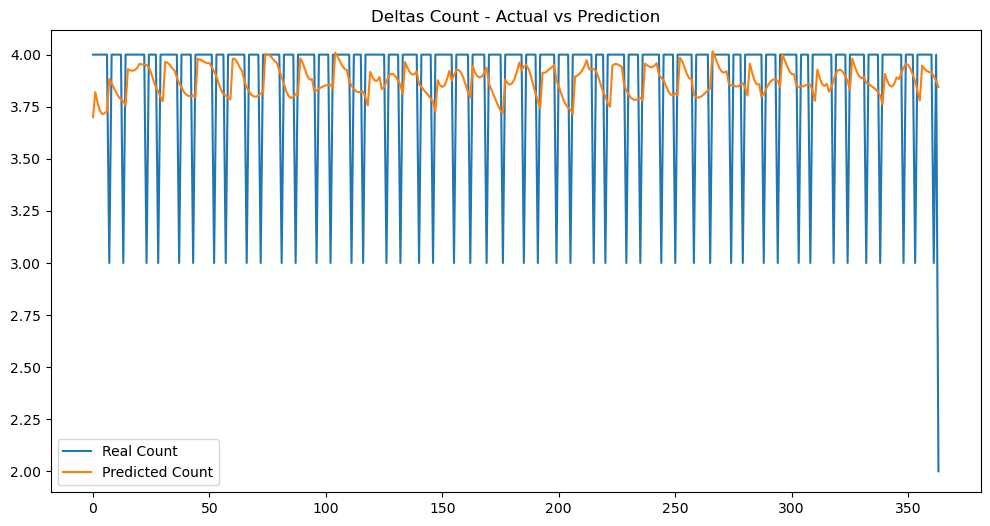

In [82]:
import matplotlib.pyplot as plt

# Compare total energy
plt.figure(figsize=(12, 6))
plt.plot(results['real_power'], label='Real Power')
plt.plot(results['predicted_power'], label='Predicted Power')
plt.title('Potencia Total - Real vs Predicción')
plt.legend()
plt.savefig('../images/Tidal_energy.png')

# Compare delta counts
plt.figure(figsize=(12, 6))
plt.plot(results['real_count'], label='Real Count')
plt.plot(results['predicted_count'], label='Predicted Count')
plt.title('Deltas Count - Actual vs Prediction')
plt.legend()
plt.savefig('../images/change_tide.png')
